<a href="https://colab.research.google.com/github/tombackert/paper/blob/main/gradcam_lime_explanation_selectivity_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Pfad zur Datei in Google Drive (ersetze den Pfad durch den Pfad deiner Datei)
file_path = '/content/drive/My Drive/experiment_results.xlsx'

In [4]:
df = pd.read_excel(file_path)

In [21]:
df.head(20)

,run,img_id,model,explainer,AUC,time_taken,per_img_results
0,0,0,AlexNet,lime,2.715264,6.358176,"{'predictions': ([1.2627605558424015e-11, 2.80..."
1,0,1,AlexNet,lime,2.885117,4.067091,"{'predictions': ([8.187116540270267e-10, 3.246..."
2,0,2,AlexNet,lime,5.156835,4.352195,"{'predictions': ([2.147221511705766e-09, 9.070..."
3,0,0,AlexNet,gradcam,5.760315,3.560527,"{'predictions': ([1.2627605558424015e-11, 2.80..."
4,0,1,AlexNet,gradcam,27.174894,3.126372,"{'predictions': ([8.187116540270267e-10, 3.246..."
5,0,2,AlexNet,gradcam,9.886065,2.843534,"{'predictions': ([2.147221511705766e-09, 9.070..."
6,0,0,ResNet50,lime,3.894776,16.330283,"{'predictions': ([0.0004688537446781993, 0.000..."
7,0,1,ResNet50,lime,6.010626,15.973188,"{'predictions': ([0.0004794349370058626, 0.000..."
8,0,2,ResNet50,lime,8.015591,15.942301,"{'predictions': ([0.00029980973340570927, 0.00..."
9,0,0,ResNet50,gradcam,6.886229,10.948544,"{'predictions': ([0.0004688537446781993, 0.000..."


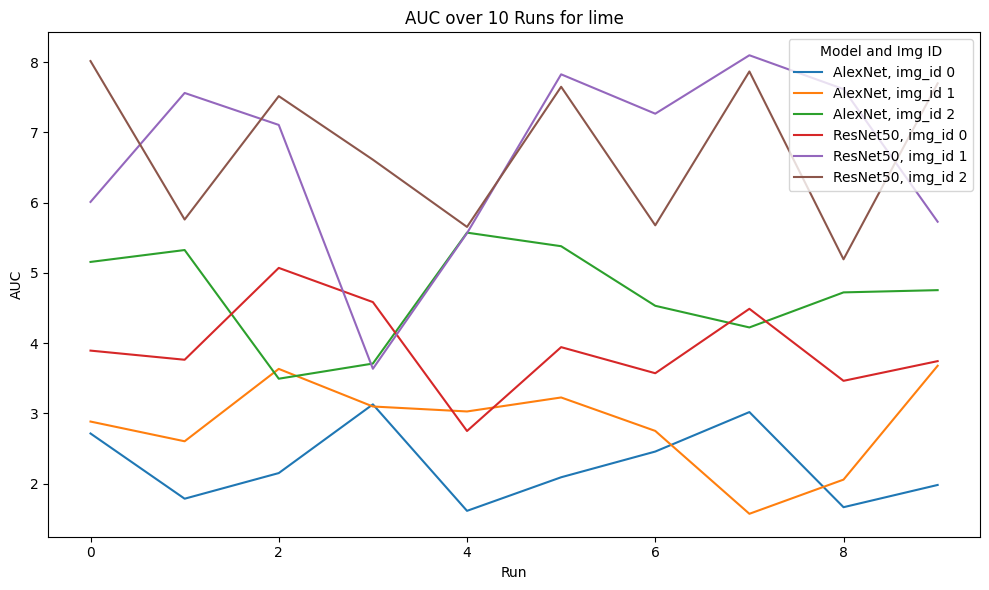

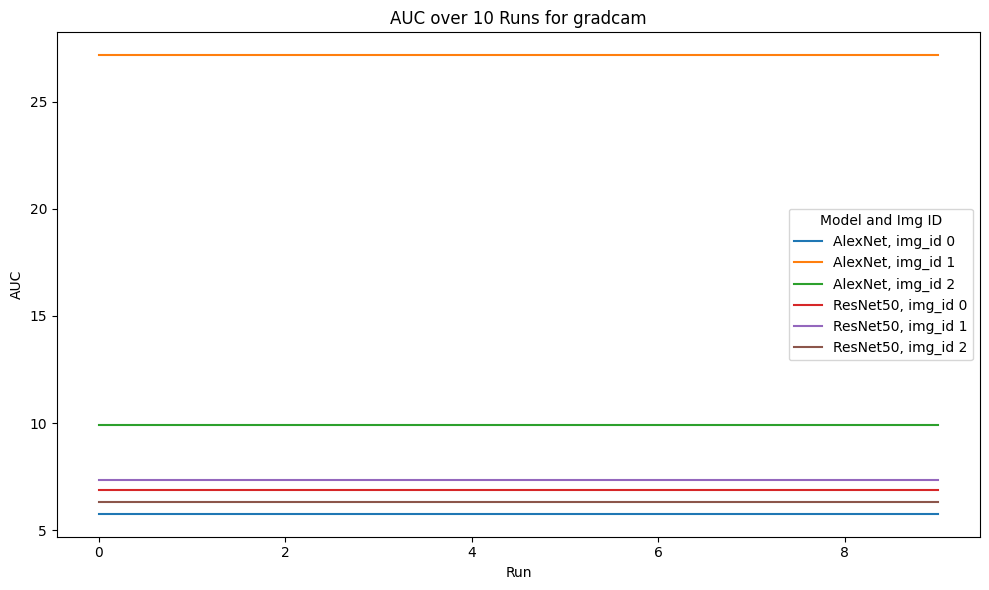

In [22]:
# We will create a plot for each explainer, showing lines for each model and img_id combination
for explainer in df['explainer'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))

    for model in df['model'].unique():
        for img_id in df['img_id'].unique():
            subset = df[(df['explainer'] == explainer) & (df['model'] == model) & (df['img_id'] == img_id)]
            if not subset.empty:
                ax.plot(subset['run'], subset['AUC'], label=f'{model}, img_id {img_id}')

    ax.set_title(f'AUC over 10 Runs for {explainer}')
    ax.set_ylabel('AUC')
    ax.set_xlabel('Run')
    ax.legend(title='Model and Img ID')
    plt.tight_layout()

    # Save figure
    plt.savefig(f"{explainer}-auc-over-10-runs.png", bbox_inches='tight', dpi=1000)
    plt.show()

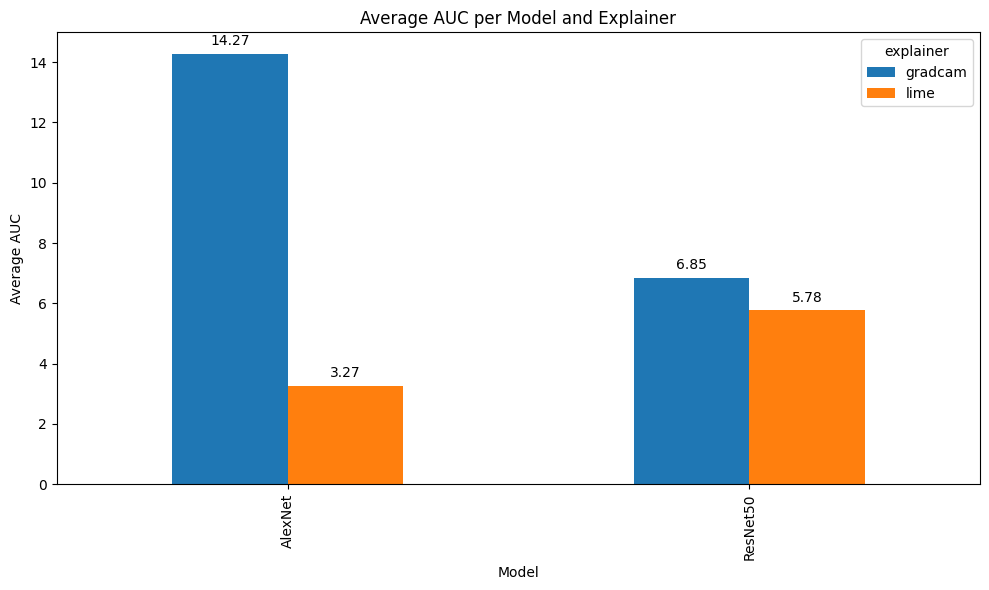

In [17]:
# Average AUC per model and explainer
avg_auc = df.groupby(['model', 'explainer'])['AUC'].mean().unstack()

ax = avg_auc.plot(kind='bar', figsize=(10, 6), title='Average AUC per Model and Explainer')

# Values over bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.ylabel('Average AUC')
plt.xlabel('Model')
plt.tight_layout()

# Save figure
plt.savefig("average-auc-per-model-and-explainer.png", bbox_inches='tight', dpi=1000)

plt.show()

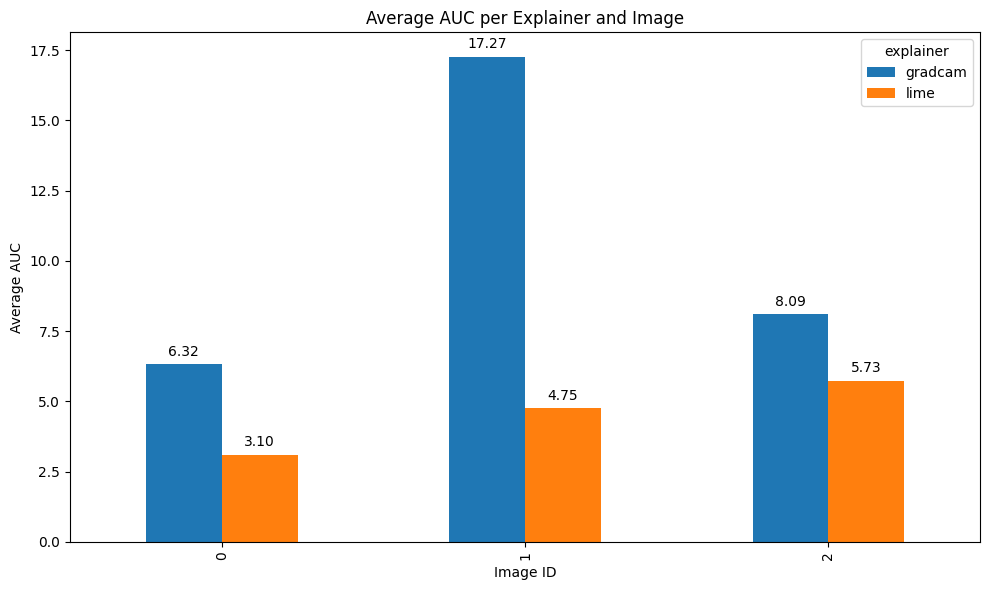

In [32]:
# Average AUC per explainer and img_id with values over bars
ax = avg_auc_img.plot(kind='bar', figsize=(10, 6), title='Average AUC per Explainer and Image')

# Werte über den Balken hinzufügen
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.ylabel('Average AUC')
plt.xlabel('Image ID')
plt.tight_layout()

# Save figure
plt.savefig("average-auc-per-explainer-and-img.png", bbox_inches='tight', dpi=1000)
plt.show()